<a href="https://colab.research.google.com/github/manishramamoorthy/Machine-Learning/blob/main/Petrol_Consumption(Multiple_Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/petrol_consumption.csv")
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Data Preprocessing

In [3]:
data.shape

(48, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [5]:
data.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [6]:
data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [7]:
data = data.drop_duplicates()

In [8]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


IQR (Inter Quantile Range)

In [16]:
# Petrol_Tax
IQR = data.Petrol_tax.quantile(0.75) - data.Petrol_tax.quantile(0.25)
Upper_Threshold = data.Petrol_tax.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = data.Petrol_tax.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  9.8125
Lower_Threshold :  5.3125


In [17]:
# Average_Income
IQR = data.Average_income.quantile(0.75) - data.Average_income.quantile(0.25)
Upper_Threshold = data.Average_income.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = data.Average_income.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  5838.375
Lower_Threshold :  2479.375


In [18]:
# Paved_Highways
IQR = data.Paved_Highways.quantile(0.75) - data.Paved_Highways.quantile(0.25)
Upper_Threshold = data.Paved_Highways.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = data.Paved_Highways.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  13224.625
Lower_Threshold :  -2958.375


EDA

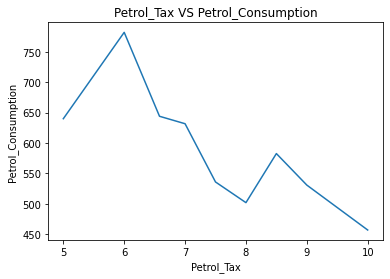

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


In [24]:
# Petrol_Tax
import matplotlib.pyplot as plt
#data.plot(x="Petrol_tax",y="Petrol_Consumption",style="o")
data.groupby("Petrol_tax")["Petrol_Consumption"].mean().plot()
plt.title("Petrol_Tax VS Petrol_Consumption")
plt.xlabel("Petrol_Tax")
plt.ylabel("Petrol_Consumption")
plt.show()
data[["Petrol_tax","Petrol_Consumption"]].corr()

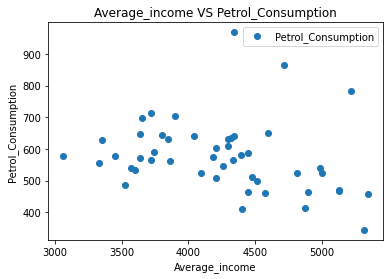

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


In [25]:
# Average_Income
data.plot(x="Average_income",y="Petrol_Consumption",style="o")
plt.title("Average_income VS Petrol_Consumption")
plt.xlabel("Average_income")
plt.ylabel("Petrol_Consumption")
plt.show()
data[["Average_income","Petrol_Consumption"]].corr()

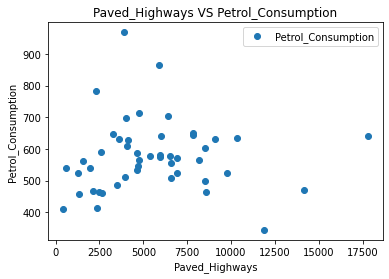

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.019042
Petrol_Consumption,0.019042,1.000000


In [26]:
# Paved_Highways
data.plot(x="Paved_Highways",y="Petrol_Consumption",style="o")
plt.title("Paved_Highways VS Petrol_Consumption")
plt.xlabel("Paved_Highways")
plt.ylabel("Petrol_Consumption")
plt.show()
data[["Paved_Highways","Petrol_Consumption"]].corr()

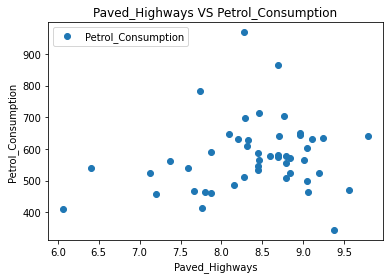

,Transformed,Petrol_Consumption
Transformed,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


In [29]:
data["Transformed"] = np.log(data["Paved_Highways"])
data.plot(x="Transformed",y="Petrol_Consumption",style="o")
plt.title("Paved_Highways VS Petrol_Consumption")
plt.xlabel("Paved_Highways")
plt.ylabel("Petrol_Consumption")
plt.show()
data[["Transformed","Petrol_Consumption"]].corr()

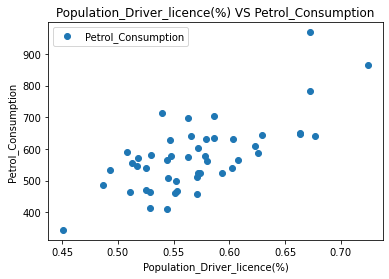

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


In [30]:
# Population_Driving_Licence
data.plot(x="Population_Driver_licence(%)",y="Petrol_Consumption",style="o")
plt.title("Population_Driver_licence(%) VS Petrol_Consumption")
plt.xlabel("Population_Driver_licence(%)")
plt.ylabel("Petrol_Consumption")
plt.show()
data[["Population_Driver_licence(%)","Petrol_Consumption"]].corr()

Split the Data

In [32]:
X = data[["Petrol_tax","Average_income","Population_Driver_licence(%)"]]
y = data["Petrol_Consumption"]

Train and Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Modelling

In [34]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [37]:
LR.coef_

array([-2.39776338e+01, -7.77280959e-02,  1.27657616e+03])

In [38]:
LR.intercept_

360.9532206534242

In [41]:
y_pred = LR.predict(X_test)

Compare Actual and Predicted Values

In [43]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
45,510,526.168544
18,865,750.785220
44,782,669.594574
20,649,682.474631
7,467,476.644545
40,587,646.434159
6,344,331.432254
27,631,621.316304
34,487,516.600015
37,704,638.277021


Evaluation Metrics

In [45]:
from sklearn import metrics
print("R2_Score:",metrics.r2_score(y_test,y_pred))

R2_Score: 0.7778919284274188
